Title : Movie Recommendation System

Objective: The objective of the the movie recommendation system, machine learning project is to provide personalized movie suggestions to viewers based on their film tastes and viewing history, enhancing their overall movie watching experience and increasing user engagement on a platform.

Data Source : https://github.com/YBI-Foundation/Dataset/blob/main/Movies%20Recommendation.csv

Import Library

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity

Import Data

In [ ]:
data=pd.read_csv("https://github.com/YBI-Foundation/Dataset/raw/main/Movies%20Recommendation.csv")

Describe Data

In [ ]:
data.head()

,Movie_ID,Movie_Title,Movie_Genre,Movie_Language,Movie_Budget,Movie_Popularity,Movie_Release_Date,Movie_Revenue,Movie_Runtime,Movie_Vote,...,Movie_Homepage,Movie_Keywords,Movie_Overview,Movie_Production_House,Movie_Production_Country,Movie_Spoken_Language,Movie_Tagline,Movie_Cast,Movie_Crew,Movie_Director
0,1,Four Rooms,Crime Comedy,en,4000000,22.876230,09-12-1995,4300000,98.0,6.5,...,NaN,hotel new year's eve witch bet hotel room,It's Ted the Bellhop's first night on the job....,"[{""name"": ""Miramax Films"", ""id"": 14}, {""name"":...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...","[{""iso_639_1"": ""en"", ""name"": ""English""}]",Twelve outrageous guests. Four scandalous requ...,Tim Roth Antonio Banderas Jennifer Beals Madon...,"[{'name': 'Allison Anders', 'gender': 1, 'depa...",Allison Anders
1,2,Star Wars,Adventure Action Science Fiction,en,11000000,126.393695,25-05-1977,775398007,121.0,8.1,...,http://www.starwars.com/films/star-wars-episod...,android galaxy hermit death star lightsaber,Princess Leia is captured and held hostage by ...,"[{""name"": ""Lucasfilm"", ""id"": 1}, {""name"": ""Twe...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...","[{""iso_639_1"": ""en"", ""name"": ""English""}]","A long time ago in a galaxy far, far away...",Mark Hamill Harrison Ford Carrie Fisher Peter ...,"[{'name': 'George Lucas', 'gender': 2, 'depart...",George Lucas
2,3,Finding Nemo,Animation Family,en,94000000,85.688789,30-05-2003,940335536,100.0,7.6,...,http://movies.disney.com/finding-nemo,father son relationship harbor underwater fish...,"Nemo, an adventurous young clownfish, is unexp...","[{""name"": ""Pixar Animation Studios"", ""id"": 3}]","[{""iso_3166_1"": ""US"", ""name"": ""United States o...","[{""iso_639_1"": ""en"", ""name"": ""English""}]","There are 3.7 trillion fish in the ocean, they...",Albert Brooks Ellen DeGeneres Alexander Gould ...,"[{'name': 'Andrew Stanton', 'gender': 2, 'depa...",Andrew Stanton
3,4,Forrest Gump,Comedy Drama Romance,en,55000000,138.133331,06-07-1994,677945399,142.0,8.2,...,NaN,vietnam veteran hippie mentally disabled runni...,A man with a low IQ has accomplished great thi...,"[{""name"": ""Paramount Pictures"", ""id"": 4}]","[{""iso_3166_1"": ""US"", ""name"": ""United States o...","[{""iso_639_1"": ""en"", ""name"": ""English""}]","The world will never be the same, once you've ...",Tom Hanks Robin Wright Gary Sinise Mykelti Wil...,"[{'name': 'Alan Silvestri', 'gender': 2, 'depa...",Robert Zemeckis
4,5,American Beauty,Drama,en,15000000,80.878605,15-09-1999,356296601,122.0,7.9,...,http://www.dreamworks.com/ab/,male nudity female nudity adultery midlife cri...,"Lester Burnham, a depressed suburban father in...","[{""name"": ""DreamWorks SKG"", ""id"": 27}, {""name""...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...","[{""iso_639_1"": ""en"", ""name"": ""English""}]",Look closer.,Kevin Spacey Annette Bening Thora Birch Wes Be...,"[{'name': 'Thomas Newman', 'gender': 2, 'depar...",Sam Mendes


In [ ]:
data.shape

(4760, 21)

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4760 entries, 0 to 4759
Data columns (total 21 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Movie_ID                  4760 non-null   int64  
 1   Movie_Title               4760 non-null   object 
 2   Movie_Genre               4760 non-null   object 
 3   Movie_Language            4760 non-null   object 
 4   Movie_Budget              4760 non-null   int64  
 5   Movie_Popularity          4760 non-null   float64
 6   Movie_Release_Date        4760 non-null   object 
 7   Movie_Revenue             4760 non-null   int64  
 8   Movie_Runtime             4758 non-null   float64
 9   Movie_Vote                4760 non-null   float64
 10  Movie_Vote_Count          4760 non-null   int64  
 11  Movie_Homepage            1699 non-null   object 
 12  Movie_Keywords            4373 non-null   object 
 13  Movie_Overview            4757 non-null   object 
 14  Movie_Pr

In [ ]:
data.describe()

,Movie_ID,Movie_Budget,Movie_Popularity,Movie_Revenue,Movie_Runtime,Movie_Vote,Movie_Vote_Count
count,4760.000000,4.760000e+03,4760.000000,4.760000e+03,4758.000000,4760.000000,4760.000000
mean,2382.566387,2.920129e+07,21.599510,8.263743e+07,107.184111,6.113866,692.508403
std,1377.270159,4.075620e+07,31.887919,1.630554e+08,21.960332,1.141294,1235.007337
min,1.000000,0.000000e+00,0.000372,0.000000e+00,0.000000,0.000000,0.000000
25%,1190.750000,9.257500e+05,4.807074,0.000000e+00,94.000000,5.600000,55.000000
50%,2380.500000,1.500000e+07,13.119058,1.944716e+07,104.000000,6.200000,238.000000
75%,3572.250000,4.000000e+07,28.411929,9.341276e+07,118.000000,6.800000,740.250000
max,4788.000000,3.800000e+08,875.581305,2.787965e+09,338.000000,10.000000,13752.000000


In [ ]:
data.columns

Index(['Movie_ID', 'Movie_Title', 'Movie_Genre', 'Movie_Language',
       'Movie_Budget', 'Movie_Popularity', 'Movie_Release_Date',
       'Movie_Revenue', 'Movie_Runtime', 'Movie_Vote', 'Movie_Vote_Count',
       'Movie_Homepage', 'Movie_Keywords', 'Movie_Overview',
       'Movie_Production_House', 'Movie_Production_Country',
       'Movie_Spoken_Language', 'Movie_Tagline', 'Movie_Cast', 'Movie_Crew',
       'Movie_Director'],
      dtype='object')

Data Visualization

Text(0, 0.5, 'Movie_Revenue')

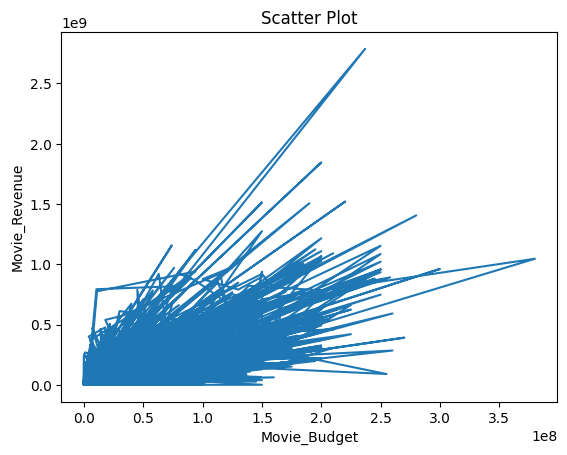

In [ ]:
plt.plot(data['Movie_Budget'],data['Movie_Revenue'])
plt.title("Scatter Plot")
plt.xlabel("Movie_Budget")
plt.ylabel("Movie_Revenue")

Text(0.5, 1.0, 'Histogram')

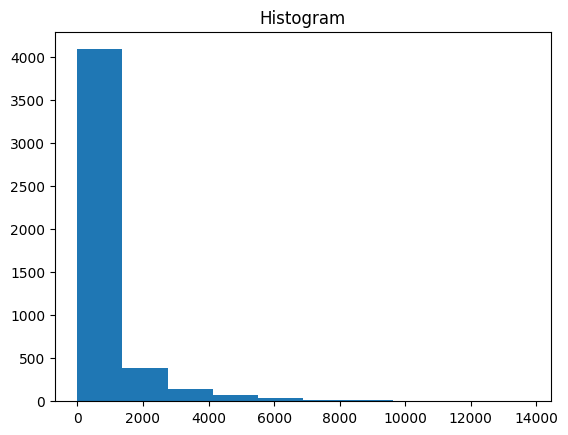

In [ ]:
plt.hist(data['Movie_Vote_Count'])
plt.title("Histogram")

Data Preprocessing

In [ ]:
data.isnull().sum()

Movie_ID                       0
Movie_Title                    0
Movie_Genre                    0
Movie_Language                 0
Movie_Budget                   0
Movie_Popularity               0
Movie_Release_Date             0
Movie_Revenue                  0
Movie_Runtime                  2
Movie_Vote                     0
Movie_Vote_Count               0
Movie_Homepage              3061
Movie_Keywords               387
Movie_Overview                 3
Movie_Production_House         0
Movie_Production_Country       0
Movie_Spoken_Language          0
Movie_Tagline                818
Movie_Cast                    27
Movie_Crew                     0
Movie_Director                22
dtype: int64

In [ ]:
data[['Movie_Cast','Movie_Homepage','Movie_Keywords','Movie_Overview','Movie_Tagline','Movie_Director']].fillna('--')

,Movie_Cast,Movie_Homepage,Movie_Keywords,Movie_Overview,Movie_Tagline,Movie_Director
0,Tim Roth Antonio Banderas Jennifer Beals Madon...,--,hotel new year's eve witch bet hotel room,It's Ted the Bellhop's first night on the job....,Twelve outrageous guests. Four scandalous requ...,Allison Anders
1,Mark Hamill Harrison Ford Carrie Fisher Peter ...,http://www.starwars.com/films/star-wars-episod...,android galaxy hermit death star lightsaber,Princess Leia is captured and held hostage by ...,"A long time ago in a galaxy far, far away...",George Lucas
2,Albert Brooks Ellen DeGeneres Alexander Gould ...,http://movies.disney.com/finding-nemo,father son relationship harbor underwater fish...,"Nemo, an adventurous young clownfish, is unexp...","There are 3.7 trillion fish in the ocean, they...",Andrew Stanton
3,Tom Hanks Robin Wright Gary Sinise Mykelti Wil...,--,vietnam veteran hippie mentally disabled runni...,A man with a low IQ has accomplished great thi...,"The world will never be the same, once you've ...",Robert Zemeckis
4,Kevin Spacey Annette Bening Thora Birch Wes Be...,http://www.dreamworks.com/ab/,male nudity female nudity adultery midlife cri...,"Lester Burnham, a depressed suburban father in...",Look closer.,Sam Mendes
...,...,...,...,...,...,...
4755,Lisa Hart Carroll Michael Des Barres Paul Drak...,--,--,A Broadway producer puts on a play with a Devi...,The hot spot where Satan's waitin'.,Pece Dingo
4756,Roni Akurati Brighton Sharbino Jason Lee Anjul...,http://www.growingupsmithmovie.com,--,"In 1979, an Indian family moves to America wit...",It’s better to stand out than to fit in.,Frank Lotito
4757,Nicole Smolen Kim Baldwin Ariana Stephens Brys...,--,christian film sex trafficking,"After sneaking to a party with her friends, 16...",She never knew it could happen to her...,Jaco Booyens
4758,--,--,--,After being estranged since her mother's death...,--,--


Define Target and Feature Variables

In [ ]:
data_1=data[['Movie_Genre','Movie_Keywords','Movie_Cast', 'Movie_Tagline','Movie_Director']].fillna('')

In [ ]:
data_1.shape

(4760, 5)

In [ ]:
X=data_1['Movie_Genre']+ ' ' +data_1['Movie_Keywords']+ ' ' +data_1['Movie_Cast']+ ' ' +data_1['Movie_Tagline']+ ' ' +data_1['Movie_Director']

In [ ]:
X

0       Crime Comedy hotel new year's eve witch bet ho...
1       Adventure Action Science Fiction android galax...
2       Animation Family father son relationship harbo...
3       Comedy Drama Romance vietnam veteran hippie me...
4       Drama male nudity female nudity adultery midli...
                              ...                        
4755    Horror  Lisa Hart Carroll Michael Des Barres P...
4756    Comedy Family Drama  Roni Akurati Brighton Sha...
4757    Thriller Drama christian film sex trafficking ...
4758                                           Family    
4759    Documentary music actors legendary perfomer cl...
Length: 4760, dtype: object

In [ ]:
X.shape

(4760,)

In [ ]:
tfidf=TfidfVectorizer()

In [ ]:
X= tfidf.fit_transform(X)

In [ ]:
X.shape

(4760, 17258)

In [ ]:
print(X)

  (0, 617)	0.1633382144407513
  (0, 492)	0.1432591540388685
  (0, 9048)	0.0866842116160778
  (0, 11161)	0.06250380151644369
  (0, 16773)	0.17654247479915475
  (0, 5612)	0.08603537588547631
  (0, 16735)	0.10690083751525419
  (0, 7904)	0.13348000542112332
  (0, 15219)	0.09800472886453934
  (0, 11242)	0.07277788238484746
  (0, 3878)	0.11998399582562203
  (0, 5499)	0.11454057510303811
  (0, 7071)	0.19822417598406614
  (0, 7454)	0.14745635785412262
  (0, 1495)	0.19712637387361423
  (0, 9206)	0.15186283580984414
  (0, 11244)	0.08262965296941757
  (0, 614)	0.07642616241686973
  (0, 12731)	0.19712637387361423
  (0, 13467)	0.19712637387361423
  (0, 5662)	0.1465525095337543
  (0, 6463)	0.18801785343006192
  (0, 11362)	0.18801785343006192
  (0, 15708)	0.17654247479915475
  (0, 15413)	0.1465525095337543
  :	:
  (4757, 5455)	0.12491480594769522
  (4757, 2967)	0.16273475835631626
  (4757, 8464)	0.23522565554066333
  (4757, 6938)	0.17088173678136628
  (4757, 8379)	0.17480603856721913
  (4757, 15303)	

Similarity score using cosine similarity

In [ ]:
Similarity_Score = cosine_similarity(X)
Similarity_Score

array([[1.        , 0.01351235, 0.03570468, ..., 0.        , 0.        ,
        0.        ],
       [0.01351235, 1.        , 0.00806674, ..., 0.        , 0.        ,
        0.        ],
       [0.03570468, 0.00806674, 1.        , ..., 0.        , 0.08014876,
        0.        ],
       ...,
       [0.        , 0.        , 0.        , ..., 1.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.08014876, ..., 0.        , 1.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        1.        ]])

In [ ]:
Similarity_Score.shape

(4760, 4760)

Movie Name Input from the user and validate for closest spelling

In [ ]:
Movie_Name=input("Enter your favorite movie name:")

Enter your favorite movie name:Star Wars


In [ ]:
print(data.columns)


Index(['Movie_ID', 'Movie_Title', 'Movie_Genre', 'Movie_Language',
       'Movie_Budget', 'Movie_Popularity', 'Movie_Release_Date',
       'Movie_Revenue', 'Movie_Runtime', 'Movie_Vote', 'Movie_Vote_Count',
       'Movie_Homepage', 'Movie_Keywords', 'Movie_Overview',
       'Movie_Production_House', 'Movie_Production_Country',
       'Movie_Spoken_Language', 'Movie_Tagline', 'Movie_Cast', 'Movie_Crew',
       'Movie_Director'],
      dtype='object')


In [ ]:
Movies_List=data['Movie_Title'].tolist()

In [ ]:
import difflib

In [ ]:
Movie_Recommended=difflib.get_close_matches(Movie_Name,Movies_List)
print(Movie_Recommended)

['Star Wars', 'Star Trek', 'State Fair']


In [ ]:
Close_Match=Movie_Recommended[0]
print(Close_Match)

Star Wars


In [ ]:
Index_of_close_match_movie=data[data.Movie_Title == Close_Match]['Movie_ID'].values[0]
print(Index_of_close_match_movie)

2


In [ ]:
# List of Recommended Movie
Recommendation_Score=list(enumerate(Similarity_Score[Index_of_close_match_movie]))
print(Recommendation_Score)

[(0, 0.0357046810425853), (1, 0.00806674385442584), (2, 1.0000000000000004), (3, 0.010521591718659169), (4, 0.0), (5, 0.0), (6, 0.01776582166456882), (7, 0.020459391814520014), (8, 0.0), (9, 0.003691894977938995), (10, 0.017357304877482896), (11, 0.004131279873878878), (12, 0.004260305191513622), (13, 0.0), (14, 0.0755600401545437), (15, 0.0), (16, 0.0), (17, 0.0), (18, 0.0038254771243029333), (19, 0.0), (20, 0.0), (21, 0.0), (22, 0.030313064953939577), (23, 0.0), (24, 0.043138053214853325), (25, 0.012683619887436534), (26, 0.03985267406354876), (27, 0.035925841296994075), (28, 0.004050565768066834), (29, 0.014601619245802841), (30, 0.016351790950860548), (31, 0.0), (32, 0.009947764091812205), (33, 0.013550651311350111), (34, 0.0), (35, 0.01104363559975108), (36, 0.0), (37, 0.010925836662603832), (38, 0.004559222984603855), (39, 0.00801173739882585), (40, 0.0), (41, 0.0), (42, 0.0), (43, 0.023445696195256015), (44, 0.016505753464896276), (45, 0.010891617144621526), (46, 0.0), (47, 0.01

In [ ]:
len(Recommendation_Score)

4760

Get All Movies Sort Based On recommendation Score

In [ ]:
Movies=sorted(Recommendation_Score, key=lambda x:x[1],reverse = True)
print(Movies)

[(2, 1.0000000000000004), (1714, 0.1875935306279091), (247, 0.1508193881467258), (3467, 0.14647318067016865), (3162, 0.13915488516680705), (3181, 0.13101873188620575), (709, 0.1283613829617165), (230, 0.12167721115770525), (1473, 0.11824097359319927), (1862, 0.11629897111683916), (3256, 0.11558704877764754), (178, 0.1111468458372592), (2040, 0.10916210938064652), (3390, 0.1073194239226595), (182, 0.10680811738851488), (2647, 0.10610558454863812), (1276, 0.1053435194920348), (4182, 0.10499343399374056), (1834, 0.10460215898310787), (2264, 0.1034495322466014), (1758, 0.1012923348551616), (106, 0.09988059705340357), (1319, 0.0987054551837175), (2135, 0.0984801505547625), (1251, 0.09798035416293525), (2322, 0.09782933850237875), (2897, 0.09714947434738225), (794, 0.09647109437560554), (1182, 0.09527958438829842), (1646, 0.09401965915647889), (1477, 0.09331707969240709), (3660, 0.09156161733706282), (4374, 0.09087169166677278), (2591, 0.09086127146024525), (1886, 0.09022740076397263), (2098

In [ ]:
# Nmaes of similar movies
i=1
for movie in Movies:
  index=movie[0]
  title=data[data.index==index]['Movie_Title'].values[0]
  if(i<31):
    print(i,'.',title)
    i=i+1

1 . Finding Nemo
2 . Shark Tale
3 . Big Fish
4 . John Carter
5 . The Muse
6 . Megamind
7 . Mallrats
8 . Spider-Man
9 . Happy Feet
10 . The Last Temptation of Christ
11 . Meet the Deedles
12 . The English Patient
13 . Death Sentence
14 . When Did You Last See Your Father?
15 . The Life Aquatic with Steve Zissou
16 . Flight of the Intruder
17 . El Mariachi
18 . Treading Water
19 . Silent Movie
20 . Bottle Rocket
21 . WALL·E
22 . The Outsiders
23 . He Got Game
24 . Ponyo
25 . American Dreamz
26 . Zoom
27 . Shooting Fish
28 . Bambi
29 . Dear Frankie
30 . Freaky Friday


Explanation :I designed an advanced movie recommendation system using a rich Kaggle dataset. After carefully cleaning the data, including addressing missing values, I visually explored it with informative scatter and bar plots. The system employs sophisticated similarity scoring methods, like cosine similarity, to create personalized movie recommendations for users based on their preferences. Despite its user-friendly interface, the system excels at delivering tailored movie suggestions, showcasing the potential of data-driven personalization.